# 1) GRADIENT DESCENT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
# %matplotlib qt

## Funciones no convexa

$$
F(x,y)=\sin \left ( \frac{1}{2}x^{2} -\frac{1}{4}y^{2}+3 \right )\cos \left ( 2x+1-e^{y} \right )
$$

In [ ]:
func1 = lambda th: np.sin(1 / 2* th[0] ** 2 -1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

$$
F\left ( x,y \right )=\left ( x^{2}+y-11 \right )^{2} + \left ( x+y^{2}-7 \right )^{2} 
$$

In [ ]:
func2 = lambda th: ((th[0]**2 + th[1] - 11)**2 + (th[0] + th[1]**2 - 7)**2)

## Funcion para graficar las funciones

In [ ]:
def generate_graph(x_range, y_range, function, gradient=False, n_points=100):
    """
    @Params
        x_range  : Rango en el eje x
        y_range  : Rango en el eje y
        function : Funcion para graficar
        gradient : lista de puntos por los cuales el algoritmo va descendiendo
        n_points : numero de puntos para cada rango
    """
    
    # Generando los datos X e Y
    _X = np.linspace(x_range[0], x_range[1], n_points)
    _Y = np.linspace(y_range[0], y_range[1], n_points)
    X, Y= np.meshgrid(_X,_Y)
    
    # Generando los datos de Z
    Z = np.zeros((n_points,n_points))
    for ix, x in enumerate(_X):
        for iy, y in enumerate(_Y):
            Z[iy, ix] = function([x,y])

    # Creando la figura
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(121, projection='3d')

    # ax.plot_wireframe(X, Y, _Z, rstride=1, cstride=1, alpha=.5 )
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none',alpha=.8)
    if gradient :
        ax.plot(gradient[0], gradient[1], gradient[2], c='red', marker='o')
    
    # ax.plot_wireframe(X, Y, _Z)
    ax.set_xlabel("X axis label")
    ax.set_ylabel("Y axis label")
    ax.set_zlabel("Z axis label")
    ax.set_xlim(x_range[0], x_range[1])
    ax.set_ylim(y_range[0], x_range[1])
    ax.set_zlim([np.min(Z),np.max(Z)])
    
    
    ax2 = fig.add_subplot(122)
    ax2.contourf(X, Y, Z,50,vmin=np.min(Z), vmax=(np.max(Z)), alpha=.8)
    if gradient :
        ax2.plot(gradient[0], gradient[1], marker="o", c="red")

    plt.show()
    return

## Grafica de la funcion

In [ ]:
generate_graph([-2,2],[-2,2],func1,False,100)

In [ ]:
generate_graph([-6,6],[-6,6],func2,False,100)

## Algoritmo de Gradient Descent

In [ ]:
def gradient_descent(function, Theta, learning_rate=0.001, iterations=100000):

    h = 0.001

    
    # Lista de puntos de
    point_x = [Theta[0]]
    point_y = [Theta[1]]
    point_z = [function(Theta)]

    
    gradiente = np.zeros(2)

    for _ in range(iterations):

        for it, th in enumerate(Theta):            

            # Incremento
            _Theta = np.copy(Theta)
            _Theta[it] = _Theta[it] + h

            # Derivada
            derivada = (function(_Theta) - function(Theta)) / h

            # Gradiente
            gradiente[it] = derivada

        # Actualizar Theta
        Theta = Theta - learning_rate * gradiente
#         if int(input()) == 1:
#             break
        if(_ % 1000 == 0):
#             info = "Theta[0] = {}\nTheta[1] = {}\n".format(Theta[0], Theta[1])
#             print(info)
            point_x.append(Theta[0])
            point_y.append(Theta[1])
            point_z.append(function(Theta))
    
    return point_x, point_y, point_z
    
    

## Graficando la funcion con los puntos obtenidos del GD

#### Funcion # 1

In [ ]:
g = gradient_descent(func1, [0,0], 0.001)

In [ ]:
generate_graph([-2.3,2.3],[-2.3,2.3],func1,g,100)

#### Funcion # 2

In [ ]:
g = gradient_descent(func2, [5.9,5.8],0.005)

In [ ]:
generate_graph([-6,6],[-6,6],func2,g,100)

# 2) RED NEURONAL

### LA NEURONA

![image.png](attachment:13569442-9409-4a85-bdd3-43798ee25e72.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
X, Y = make_circles(n_samples=10, factor=0.5, noise=0.05)

In [ ]:
X, Y

(array([[ 0.57274179, -0.00298032],
        [ 0.18298245,  0.40737939],
        [ 0.32285947,  0.8779364 ],
        [-0.4328979 , -0.28058602],
        [ 1.05856706,  0.05457518],
        [ 0.1000991 , -0.39176455],
        [-0.75920526, -0.59745105],
        [ 0.2323327 , -0.86226166],
        [-0.77622541,  0.70762213],
        [-0.43565337,  0.30642205]]),
 array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1]))

### Generando un dataset

In [ ]:
# Numero de datos a generar
n = 500

# Dimension de los datos
p = 2

# Generando datos 
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]


### Graficando el dataset

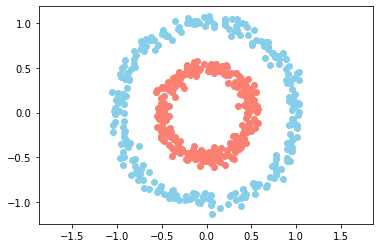

In [ ]:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()


### Clase de la capa de la red

In [ ]:
class neural_layer():
 
    def __init__(self, n_conn, n_neur, act_f):
        
        # Funcion de activacion
        self.act_f = act_f
        
        # Inicializando  b y W para la neurona en la capa
        # con valores aleatorios entre -1 y 1 
        self.b = np.random.rand(1, n_neur)      * 2 - 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1


### Funciones de activacion

![image.png](attachment:ce63e53a-e117-4673-ba41-4500ee75b9a1.png)

![image.png](attachment:b63e9726-77b1-476c-90ca-95c203cbdddb.png)

In [ ]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

tanh = (lambda x: (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)),
       lambda x: 1-(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))**2)

relu = (lambda x: np.maximum(0, x),
       lambda x: (x > 0).astype(int))


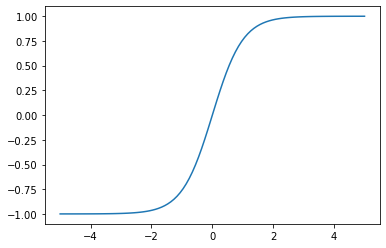

In [ ]:
# Visualizar las funciones de activacion
_x = np.linspace(-5, 5, 100)
plt.plot(_x, tanh[0](_x))

### Creando una red neuronal

![image.png](attachment:92515f87-9d1e-4ce4-9cf6-d6c72ed8270c.png)

In [ ]:
# Creando capa por capa
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

In [ ]:
def create_nn(topology, act_f):  
    
    # Lista que tendra todas las capas
    # segun la topologia que especificamos
    nn = []  
    
    for l, layer in enumerate(topology[:-1]):

        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

In [ ]:
topology = [2, 4, 2]
neural_net = create_nn(topology, tanh)

In [ ]:
neural_net[0].b

array([[-0.65467301,  0.39813116,  0.86527256,  0.13705744]])

### Entrenamiento de la red neuronal

![image.png](back.gif)!

In [ ]:
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
    out = [(None, X)]
    
    # Forward pass
    for l, layer in enumerate(neural_net):
  
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)

        out.append((z, a))
    
  
    if train:
    
        # Backward pass 
        deltas = []

        for l in reversed(range(0, len(neural_net))): 

            z = out[l+1][0]
            a = out[l+1][1]
            
            # si Ultima capa
            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

            _W = neural_net[l].W

            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
      
    return out[-1][1]


![image.png](attachment:34bdebe5-a658-437d-996c-3a96cf3887e7.png)

In [ ]:
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

In [ ]:
topology = [2,4,2]
neural_net = create_nn(topology, sigm)


In [ ]:
for i in range(2500):
    a = train(neural_net, X, Y, l2_cost, 0.05)

In [ ]:
l2_cost[0](a,Y)

0.02289621766386312

### Visualizacion del entrenamiento y el error

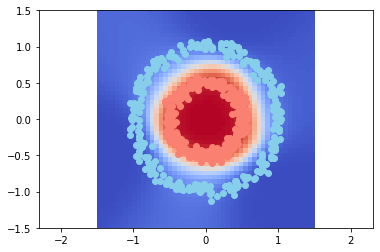

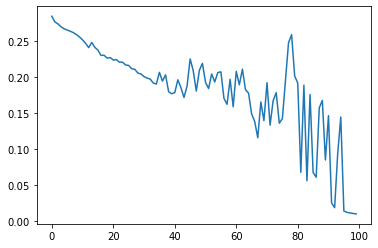

In [ ]:
t = [2, 4, 8, 1]
topology = [2,4,2]
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
    # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
    if i % 25 == 0:        
#         print(pY)

        loss.append(l2_cost[0](pY, Y))

        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)